# Model Definition and Evaluation

This notebook defines, tunes, and evaluates a Random Forest model for bakery sales forecasting.

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
print('Libraries loaded')

Libraries loaded


## Load and Prepare Dataset

In [9]:
data = pd.read_csv('/workspaces/bakery_sales_prediction/merged_sales_weather_kiwo_data.csv', parse_dates=['Datum'])
data = data.dropna(subset=['Umsatz'])
print(f'Dataset loaded. Rows: {len(data)}, Columns: {data.shape[1]}')

Dataset loaded. Rows: 9334, Columns: 21


## Feature Selection and Preparation

In [10]:
features = [
    'Warengruppe', 'KielerWoche', 'DayOfWeek', 'Weekend', 'Month',
    'TemperatureCategory', 'CloudCategory', 'WindCategory',
    'IsHoliday_lib', 'HolidayName', 'Season'
]
target = 'Umsatz'
X = data[features]
y = data[target]
print('Features and target separated')

Features and target separated


## Feature Engineering

In [11]:
categorical_features = [
    'Warengruppe', 'TemperatureCategory', 'CloudCategory', 'WindCategory',
    'HolidayName', 'Season'
]
numerical_features = [
    'KielerWoche', 'DayOfWeek', 'Weekend', 'Month', 'IsHoliday_lib'
]

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
], remainder='passthrough')
print('Preprocessing pipeline created')

Preprocessing pipeline created


## Hyperparameter Tuning

In [12]:
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

param_grid = {
    'model__n_estimators': [50, 100],
    'model__max_depth': [10, 20, None],
    'model__min_samples_split': [2, 5]
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_estimators': 50}


## Model Evaluation

In [13]:
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape:.4f}")
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.3f}')

MAPE: 0.1914
Mean Squared Error: 5134.01
R² Score: 0.758


## Actual vs. Predicted Sales Plot

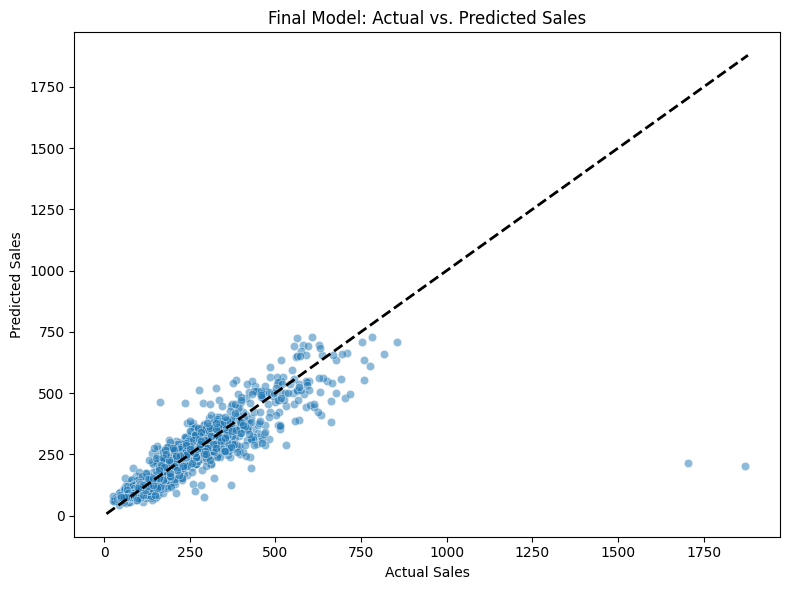

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title('Final Model: Actual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.tight_layout()
plt.show()

## Save the Model

In [ ]:
joblib.dump(best_model, 'final_sales_forecasting_model.pkl')
print('✅ Model saved as final_sales_forecasting_model.pkl')